# EEG Eye State

http://archive.ics.uci.edu/ml/datasets/EEG+Eye+State

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

## Load Data

In [60]:
headers = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4", "EYE"]

df = pd.read_csv('data/EEG_Eye_State.csv', names=headers)
#df.head()
df.shape

(14980, 15)

## Data Preprocessing

### Clean AF3 data that is too large or too small

#### Set the abnormal values to NaN

In [61]:
for k, v in enumerate(df['AF3']):
    if v < 4000 or v > 5000:
        df.set_value(k, 'AF3', 'NaN')

In [62]:
for k, v in enumerate(df['F7']):
    if v < 3850 or v > 4200:
        df.set_value(k, 'F7', 'NaN')

In [63]:
for k, v in enumerate(df['F3']):
    if v < 4000 or v > 4500:
        df.set_value(k, 'F3', 'NaN')

In [64]:
for k, v in enumerate(df['FC5']):
    if v < 4000 or v > 4500:
        df.set_value(k, 'FC5', 'NaN')

In [65]:
for k, v in enumerate(df['T7']):
    if v < 4000 or v > 5000:
        df.set_value(k, 'T7', 'NaN')

In [66]:
for k, v in enumerate(df['P7']):
    if v < 4500 or v > 4800:
        df.set_value(k, 'P7', 'NaN')

In [67]:
for k, v in enumerate(df['O1']):
    if v < 4000 or v > 4200:
        df.set_value(k, 'O1', 'NaN')

In [68]:
for k, v in enumerate(df['O2']):
    if v < 4500 or v > 4750:
        df.set_value(k, 'O2', 'NaN')

In [69]:
for k, v in enumerate(df['P8']):
    if v < 4000 or v > 4400:
        df.set_value(k, 'P8', 'NaN')

In [70]:
for k, v in enumerate(df['T8']):
    if v < 4000 or v > 4400:
        df.set_value(k, 'T8', 'NaN')

In [71]:
for k, v in enumerate(df['FC6']):
    if v < 4000 or v > 4400:
        df.set_value(k, 'FC6', 'NaN')

In [72]:
for k, v in enumerate(df['F4']):
    if v < 4000 or v > 4400:
        df.set_value(k, 'F4', 'NaN')

In [73]:
for k, v in enumerate(df['F8']):
    if v < 4000 or v > 5000:
        df.set_value(k, 'F8', 'NaN')

In [74]:
for k, v in enumerate(df['AF4']):
    if v < 4000 or v > 5000:
        df.set_value(k, 'AF4', 'NaN')

#### Find all NaNs in the df and impute them with mean

In [75]:
ip = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = ip.fit_transform(df)

#### The Imputer returns a np array, so we have to transform it to a pd df

In [76]:
df = pd.DataFrame(data=X, columns=headers)

#### Plot to check with the abnormal value removal result

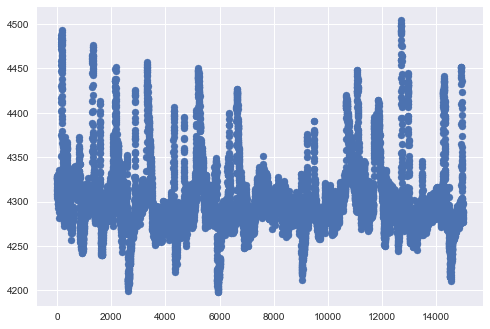

In [77]:
plt.scatter(np.arange(len(df['AF3'])),df['AF3'])
plt.show()

### Standard Scaler to all columns

#### Remove the EYE column first, it does not need to be standardized

In [78]:
temp = df['EYE']
del df['EYE']

### Merge the EYE column in after other columns been standardized

In [79]:
sc = StandardScaler()
df[df.columns] = sc.fit_transform(df[df.columns])
df = pd.concat([df, temp], axis=1)

## Data Visualization

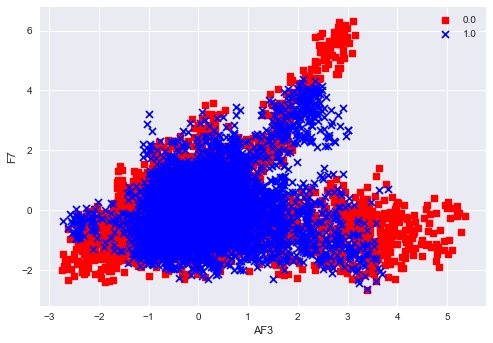

In [80]:
colors = ['r', 'b']
markers = ['s', 'x']

for l, c, m in zip(np.unique(df["EYE"]), colors, markers): 
    plt.scatter(df["AF3"][df["EYE"]==l],
                df["O2"][df["EYE"]==l],
                c=c, label=l, marker=m)
plt.xlabel('AF3')
plt.ylabel('F7')
plt.legend()
plt.show()

## Machine Learning

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianrocessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# X is the df without the column 'EYE'
y = df['EYE']
del df['EYE']
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardize X and y
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_test_std, X_train_std))
y_combined_std = np.hstack((y_test, y_train))

for name, clf in zip(names, classifiers):
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_train_std)
    print(name)
    print('Training accuracy: %.2f' % accuracy_score(y_train, y_pred))
    
    y_pred = clf.predict(X_test_std)
    print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))


In [81]:
y = df['EYE']
del df['EYE']
X = df
X = X.as_matrix()
y = y.as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
y_train.shape

(10486,)

In [83]:
X_train.shape

(10486, 14)

In [84]:
from keras.utils.np_utils import to_categorical
y_train_ohe = to_categorical(y_train)


In [85]:
y_train_ohe

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

## Training Neural Networks with Keras

In [94]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],
                units=100,
                kernel_initializer='uniform',
               activation='tanh'))
model.add(Dense(input_dim=100,
                units=100,
                kernel_initializer='uniform',
               activation='tanh'))
model.add(Dense(input_dim=100,
                units=50,
                kernel_initializer='uniform',
               activation='tanh'))
model.add(Dense(input_dim=50,
                units=y_train_ohe.shape[1],
                kernel_initializer='uniform',
               activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-7, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [95]:
model.fit(X_train, 
          y_train_ohe, 
          epochs=50,
          batch_size=300,
          verbose=2,
          validation_split=0.1)

Train on 9437 samples, validate on 1049 samples
Epoch 1/50
0s - loss: 0.6926 - val_loss: 0.6918
Epoch 2/50
0s - loss: 0.6911 - val_loss: 0.6905
Epoch 3/50
0s - loss: 0.6900 - val_loss: 0.6895
Epoch 4/50
0s - loss: 0.6892 - val_loss: 0.6888
Epoch 5/50
0s - loss: 0.6886 - val_loss: 0.6883
Epoch 6/50
0s - loss: 0.6882 - val_loss: 0.6879
Epoch 7/50
0s - loss: 0.6879 - val_loss: 0.6876
Epoch 8/50
0s - loss: 0.6877 - val_loss: 0.6874
Epoch 9/50
0s - loss: 0.6875 - val_loss: 0.6873
Epoch 10/50
0s - loss: 0.6874 - val_loss: 0.6872
Epoch 11/50
0s - loss: 0.6873 - val_loss: 0.6871
Epoch 12/50
0s - loss: 0.6872 - val_loss: 0.6871
Epoch 13/50
0s - loss: 0.6872 - val_loss: 0.6870
Epoch 14/50
0s - loss: 0.6871 - val_loss: 0.6870
Epoch 15/50
0s - loss: 0.6871 - val_loss: 0.6869
Epoch 16/50
0s - loss: 0.6871 - val_loss: 0.6869
Epoch 17/50
0s - loss: 0.6870 - val_loss: 0.6869
Epoch 18/50
0s - loss: 0.6870 - val_loss: 0.6868
Epoch 19/50
0s - loss: 0.6870 - val_loss: 0.6868
Epoch 20/50
0s - loss: 0.6870 

In [96]:
y_train_pred = model.predict_classes(X_train, verbose=0)
train_acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
train_acc

0.55378600038146097

In [97]:
y_test_pred = model.predict_classes(X_test, verbose=0)
train_acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
train_acc

0.54517133956386288